# **1**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/police.csv')

df.head()


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [ ]:
gender_violation = df['driver_gender'].value_counts(normalize=True)

print(gender_violation)

driver_gender
M    0.72527
F    0.27473
Name: proportion, dtype: float64


In [ ]:
pelanggaran_gender = df.groupby(['driver_gender', 'violation']).size()


pelanggaran_gender_prop = pelanggaran_gender.groupby(level=0).apply(lambda x: x / x.sum())


pelanggaran_gender_df = pd.DataFrame({
    'driver_gender': pelanggaran_gender_prop.index.get_level_values(0),
    'violation': pelanggaran_gender_prop.index.get_level_values(1),
    'proportion': pelanggaran_gender_prop.values
})

pelanggaran_gender_df

,driver_gender,violation,proportion
0,F,F,0.105199
1,F,F,0.138218
2,F,F,0.029738
3,F,F,0.044418
4,F,F,0.024312
5,F,F,0.658114
6,M,M,0.134158
7,M,M,0.206144
8,M,M,0.058985
9,M,M,0.042175


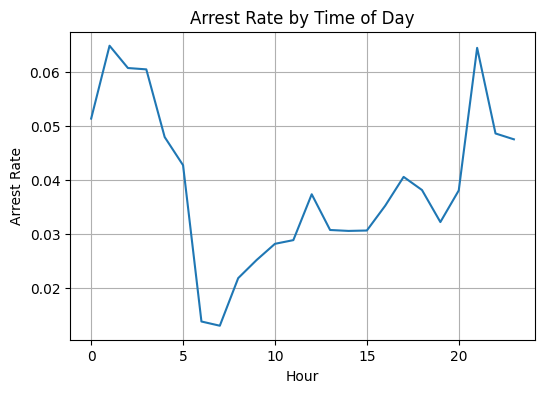

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/police.csv')

# Konversi datetime
df['stop_datetime'] = pd.to_datetime(df['stop_date'] + ' ' + df['stop_time'], errors='coerce')
df['hour'] = df['stop_datetime'].dt.hour

# Hitung tingkat penangkapan per jam
d_result = df.groupby('hour')['is_arrested'].mean()

# Plot grafik
plt.figure(figsize=(6,4))
d_result.plot()
plt.title('Arrest Rate by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.show()

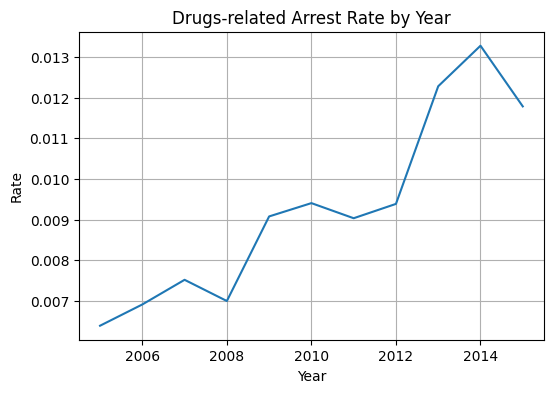

In [ ]:
df['year'] = df['stop_datetime'].dt.year

# Hitung proporsi penangkapan karena narkoba per tahun
e_result = df[df['drugs_related_stop'] == True].groupby('year').size() / df.groupby('year').size()

# Plot grafik
plt.figure(figsize=(6,4))
e_result.plot()
plt.title('Drugs-related Arrest Rate by Year')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

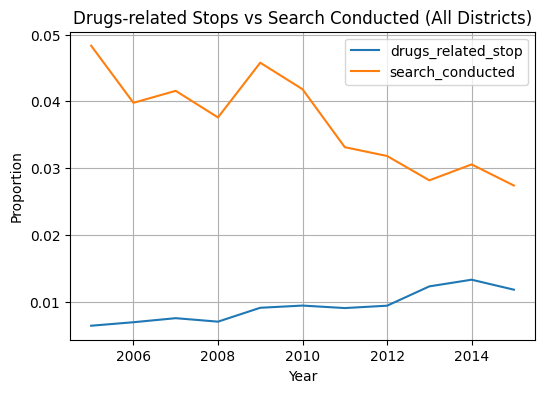

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan data sudah dimuat dan tanggal dikonversi
df = pd.read_csv('/content/police.csv')
df['stop_datetime'] = pd.to_datetime(df['stop_date'] + ' ' + df['stop_time'], errors='coerce')
df['year'] = df['stop_datetime'].dt.year

# Hitung rata-rata per tahun untuk dua variabel
f_drugs = df.groupby('year')['drugs_related_stop'].mean()
f_search = df.groupby('year')['search_conducted'].mean()

# Plot grafik
plt.figure(figsize=(6,4))
f_drugs.plot(label='drugs_related_stop')
f_search.plot(label='search_conducted')
plt.title('Drugs-related Stops vs Search Conducted (All Districts)')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

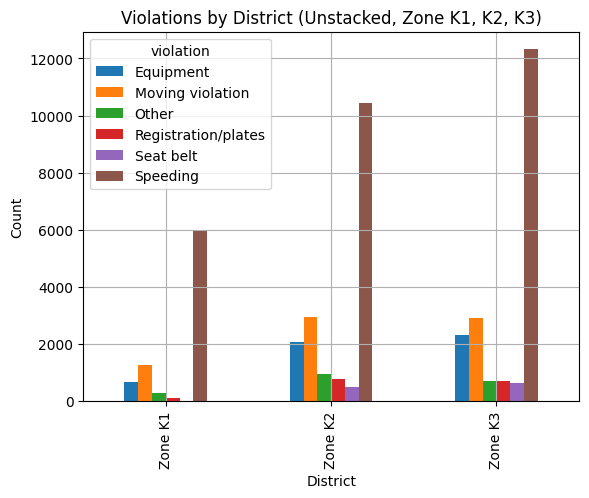

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dan siapkan data
df = pd.read_csv('/content/police.csv')

# Filter hanya Zone K1, K2, dan K3
df_k = df[df['district'].isin(['Zone K1', 'Zone K2', 'Zone K3'])]

# Hitung jumlah pelanggaran per distrik
gh_k_result = df_k.groupby(['district', 'violation']).size().unstack().fillna(0)

# Plot grafik batang (tidak ditumpuk)
plt.figure(figsize=(8,5))
gh_k_result.plot(kind='bar', stacked=False)
plt.title('Violations by District (Unstacked, Zone K1, K2, K3)')
plt.ylabel('Count')
plt.xlabel('District')
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

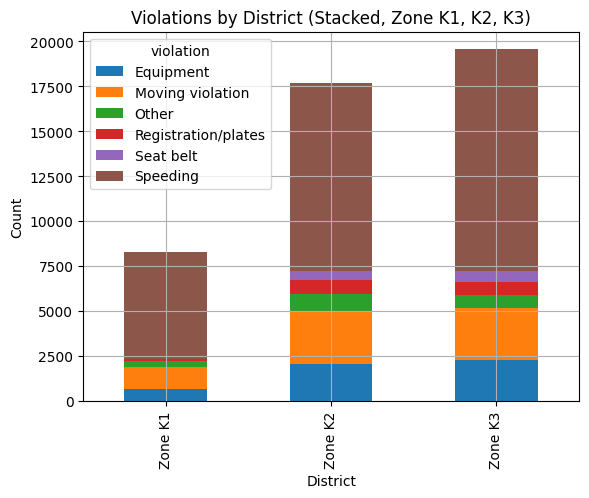

In [ ]:
# Filter hanya untuk Zone K1, K2, K3
gh_k_result = df[df['district'].isin(['Zone K1', 'Zone K2', 'Zone K3'])]
gh_k_grouped = gh_k_result.groupby(['district', 'violation']).size().unstack().fillna(0)

# Plot grafik stacked
plt.figure(figsize=(8,5))
gh_k_grouped.plot(kind='bar', stacked=True)
plt.title('Violations by District (Stacked, Zone K1, K2, K3)')
plt.ylabel('Count')
plt.xlabel('District')
plt.grid(True)
plt.show()

# **2**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load data
data = pd.read_csv('/content/testcpns.csv')  # ganti path sesuai lokasi file

# Lihat 5 baris pertama
data.head()
# Ringkasan statistik
data.describe()

,toefl,ipk,pengalaman_kerja,diterima
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,2.694500,3.425000,0.475000
std,61.427464,0.653899,1.737778,0.505736
min,540.000000,1.070000,1.000000,0.000000
25%,607.500000,2.070000,2.000000,0.000000
50%,660.000000,3.030000,4.000000,0.000000
75%,690.000000,3.070000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


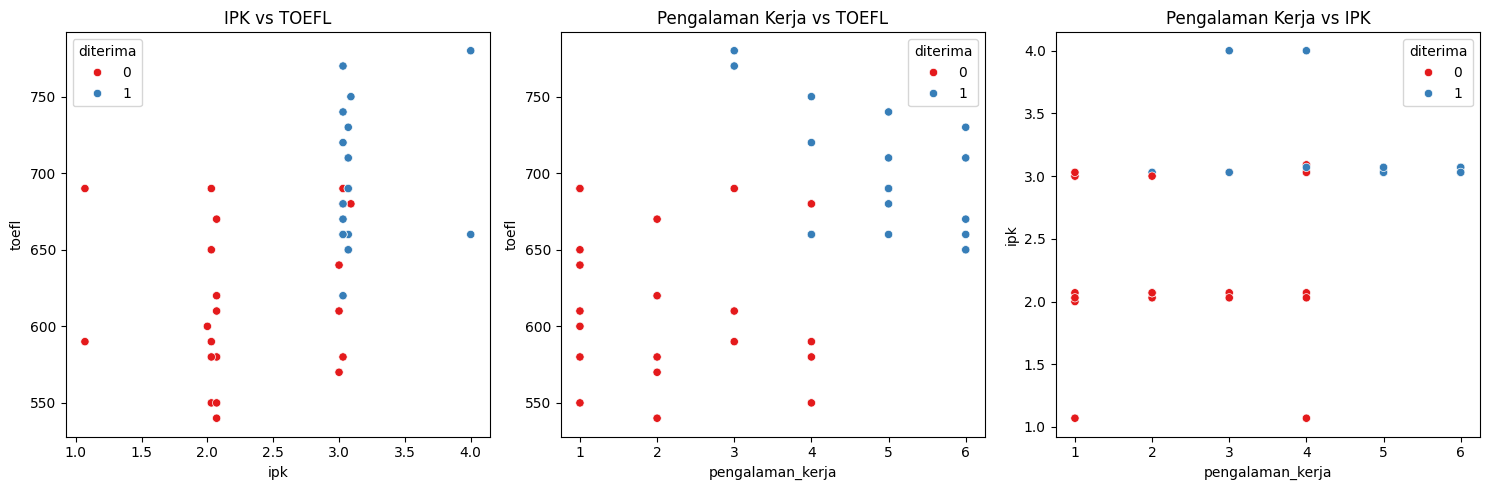

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data
df = pd.read_csv('/content/testcpns.csv')

# Ukuran figure
plt.figure(figsize=(15, 5))

# Scatter plot 1: ipk vs toefl
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='ipk', y='toefl', hue='diterima', palette='Set1')
plt.title('IPK vs TOEFL')

# Scatter plot 2: pengalaman_kerja vs toefl
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='pengalaman_kerja', y='toefl', hue='diterima', palette='Set1')
plt.title('Pengalaman Kerja vs TOEFL')

# Scatter plot 3: pengalaman_kerja vs ipk
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='pengalaman_kerja', y='ipk', hue='diterima', palette='Set1')
plt.title('Pengalaman Kerja vs IPK')

# Tampilkan plot
plt.tight_layout()
plt.show()


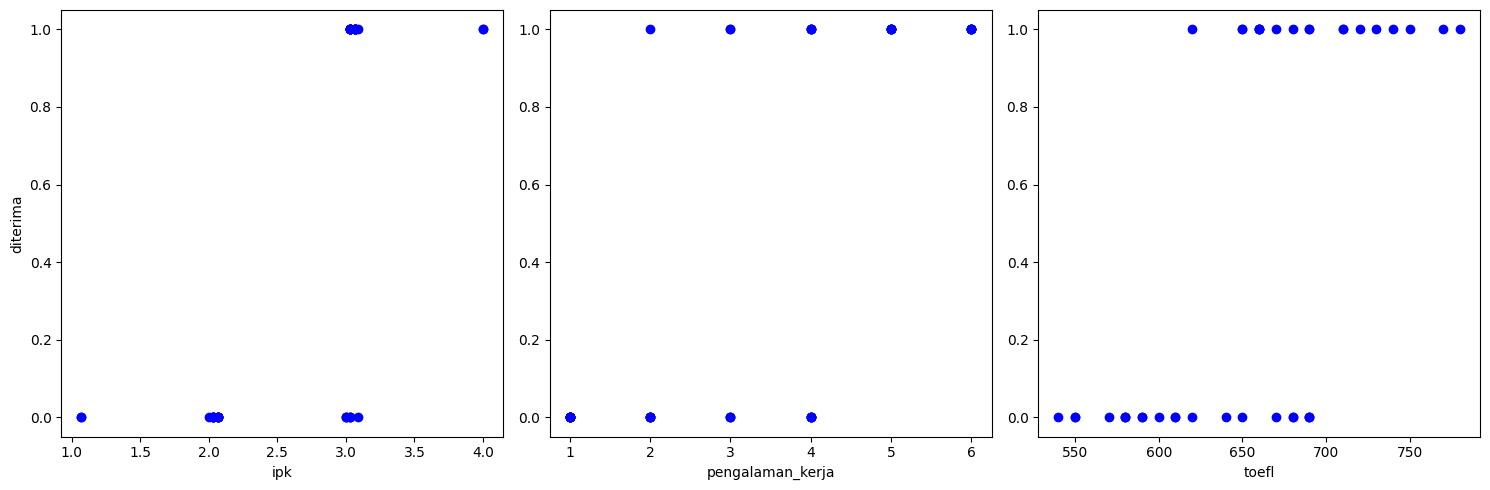

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/testcpns.csv')

# Membuat subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot IPK vs Diterima
axes[0].scatter(df['ipk'], df['diterima'], color='blue')
axes[0].set_xlabel('ipk')
axes[0].set_ylabel('diterima')

# Plot Pengalaman Kerja vs Diterima
axes[1].scatter(df['pengalaman_kerja'], df['diterima'], color='blue')
axes[1].set_xlabel('pengalaman_kerja')

# Plot TOEFL vs Diterima
axes[2].scatter(df['toefl'], df['diterima'], color='blue')
axes[2].set_xlabel('toefl')

# Tampilkan plot
plt.tight_layout()
plt.show()


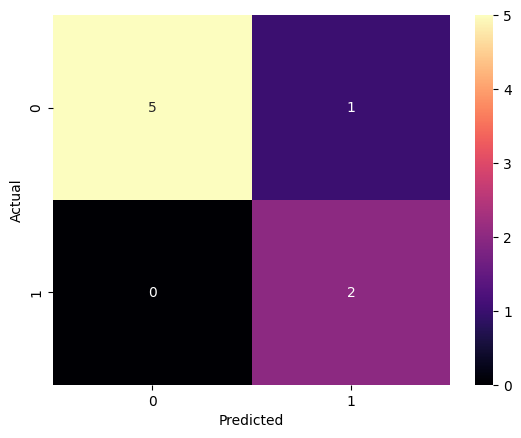

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('//content/testcpns.csv')

# Misal kita gunakan fitur: ipk, pengalaman_kerja, toefl
X = df[['ipk', 'pengalaman_kerja', 'toefl']]
y = df['diterima']

# Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='magma', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


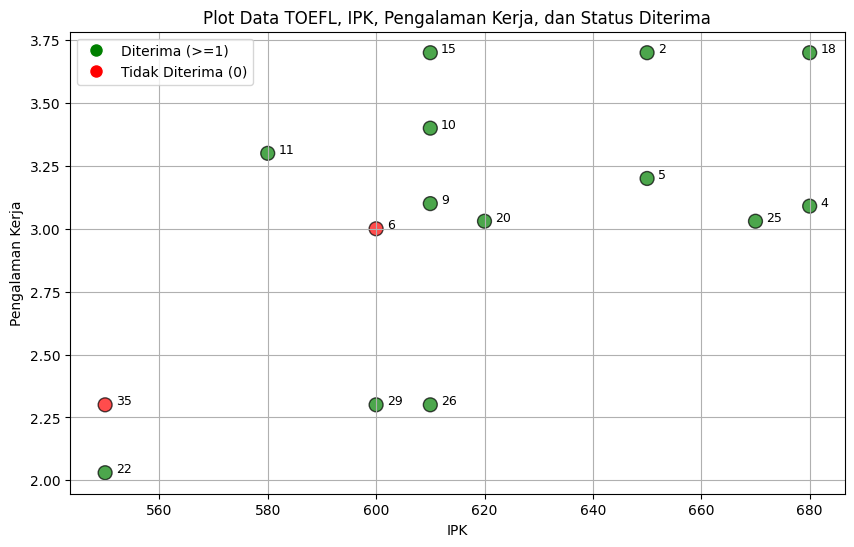

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Membuat dataframe sesuai dengan tabel
data = {
    'toefl': [22, 20, 25, 4, 2, 10, 15, 6, 11, 9, 5, 18, 26, 29, 35],
    'ipk': [550, 620, 670, 680, 650, 610, 610, 600, 580, 610, 650, 680, 610, 600, 550],
    'pengalaman_kerja': [2.03, 3.03, 3.03, 3.09, 3.7, 3.4, 3.7, 3.0, 3.3, 3.1, 3.2, 3.7, 2.3, 2.3, 2.3],
    'diterima': [4, 2, 4, 6, 6, 3, 4, 0, 1, 3, 5, 5, 1, 1, 0]
}

df = pd.DataFrame(data)

# Warna hijau jika diterima (>=1), merah jika tidak
colors = ['green' if x >= 1 else 'red' for x in df['diterima']]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['ipk'], df['pengalaman_kerja'],
            s=100, c=colors, edgecolors='black', alpha=0.7)

# Label titik dengan nilai TOEFL
for i in range(len(df)):
    plt.text(df['ipk'][i] + 2, df['pengalaman_kerja'][i],
             f"{df['toefl'][i]}", fontsize=9)

plt.xlabel("IPK")
plt.ylabel("Pengalaman Kerja")
plt.title("Plot Data TOEFL, IPK, Pengalaman Kerja, dan Status Diterima")
plt.grid(True)

# Buat legenda manual
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Diterima (>=1)',
           markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Tidak Diterima (0)',
           markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)

plt.show()


In [ ]:
subset_index = [22, 20, 25, 4, 10, 15, 28, 11, 18, 29, 27, 35]

# Ambil baris di mana kolom 'toefl' cocok dengan nilai-nilai di atas
subset = df[df['toefl'].isin(subset_index)]

# Tampilkan hasilnya
print("=== Subset Data ===")
print(subset.to_string(index=False))


=== Subset Data ===
 toefl  ipk  pengalaman_kerja  diterima
    22  550              2.03         4
    20  620              3.03         2
    25  670              3.03         4
     4  680              3.09         6
    10  610              3.40         3
    15  610              3.70         4
    11  580              3.30         1
    18  680              3.70         5
    29  600              2.30         1
    35  550              2.30         0


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1. Data lama
data_lama = {
    'toefl': [550, 620, 670, 680, 610, 610, 580, 680, 600, 550],
    'ipk': [2.03, 3.03, 3.03, 3.09, 3.40, 3.70, 3.30, 3.70, 2.30, 2.30],
    'pengalaman_kerja': [4, 2, 4, 6, 3, 4, 1, 5, 1, 0],
    'diterima': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
}

df_lama = pd.DataFrame(data_lama)

# 2. Data pelamar baru
pelamar_baru = pd.DataFrame({
    'toefl': [590, 740, 680, 610, 710],
    'ipk': [2.00, 3.07, 3.03, 2.03, 3.00],
    'pengalaman_kerja': [3, 4, 6, 1, 5]
})

# 3. Standardisasi (karena skala TOEFL dan IPK berbeda jauh)
scaler = StandardScaler()
X_lama = scaler.fit_transform(df_lama[['toefl', 'ipk', 'pengalaman_kerja']])
X_baru = scaler.transform(pelamar_baru[['toefl', 'ipk', 'pengalaman_kerja']])
y_lama = df_lama['diterima']

# 4. Melatih model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_lama, y_lama)

# 5. Prediksi
prediksi = knn.predict(X_baru)

# 6. Tampilkan hasil
pelamar_baru['prediksi_diterima'] = prediksi
print(pelamar_baru)


   toefl   ipk  pengalaman_kerja  prediksi_diterima
0    590  2.00                 3                  1
1    740  3.07                 4                  1
2    680  3.03                 6                  1
3    610  2.03                 1                  1
4    710  3.00                 5                  1
